## Problem Statement

The executed pipeline seeks to provide valuable insights for restaurant owners and managers. This will help customers and restaurants identify areas of improvements, identifying strengths and weaknesses, menu optimization, operational enhancements, and marketing insights.

This pipeline is focused on a dataset "Bagladeshi Restaurant Reviews" that is a collection of customer reviews for restuarants in Bangladesh. The customer feedback was recorded on two major delivery apps in Baglandesh, namely: Foodpanda and Hungrynaki. This pipeline seeks to utilize the collected dataset to undertake a customer sentiment analysis that draws insights into satisfaction level of customers to enable service providers to improve the services of restaurants in Banglandesh.

The dataset was collected from the Mendeley Data website where it is available as a csv file. The dataset contains 15,000 reviews from different customers.

Dataset Source: Mendeley Data (2023), Bangladeshi Food Delivery App Restaurant Reviews, available at: https://data.mendeley.com/datasets/wc87kpk6ks/2

## Importing Relevant Libraries

All required libraries were uploaded to enable the application of different machine learning and python insights. This pipeline dataset was executed using the pandas library.

In [36]:
!pip install -U imbalanced-learn

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
tokenizer = nltk.data.load("tokenizers/punkt/english.pickle")

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [38]:
#Reads the dataset
df = pd.read_csv(r"C:\Users\HP\Bangladesi Food Delivery App Dataset.csv")
df.head()

,Unnamed: 0,createdAt,text,reviewerName,ratingvalue
0,0,2022-10-26T12:23:22Z,"To tell you the truth, they sell fried chicken...",Fariha,1
1,1,2022-10-24T11:36:45Z,Crispy was so bad,Fariha,3
2,2,2022-10-20T17:32:09Z,The restaurant provided leas items which I ord...,Juliet,1
3,3,2022-10-19T09:13:02Z,already send you a picture about my meal. tota...,Shokhina,1
4,4,2022-10-18T12:53:42Z,Excellent as before,Tabassum,5


In [39]:
print(df.shape)

#The code above prints the size of datapoints (15,017) and labels(5) in this dataset.

(15017, 5)


## Data Exploration

Data exploration is conducted to inform the pipeline on what type of data preprocessing concepts are required to clean the dataset before building the model.
Data exploration is done to check for missing values and to see whether the dataset is balanced or not. After running the code below, the dataset illustrates that it is highly imbalanced indicating the need to balance the dataset before training using oversampling. The below code also illustrates that there is no missing value or duplicate values in the dataset.

In [40]:
#Checks for any missing values in the dataset
df.isnull().sum()

Unnamed: 0      0
createdAt       0
text            0
reviewerName    0
ratingvalue     0
dtype: int64

In [41]:
#Provides a summary of information on the features in the column labels that is non null total count, name of column labels and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15017 entries, 0 to 15016
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    15017 non-null  int64 
 1   createdAt     15017 non-null  object
 2   text          15017 non-null  object
 3   reviewerName  15017 non-null  object
 4   ratingvalue   15017 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 586.7+ KB


In [42]:
#Reviews the total value count for each star between 1 to 5 in the 'ratingvalue' column
df['ratingvalue'].value_counts()

1    5436
5    4199
4    1979
3    1927
2    1476
Name: ratingvalue, dtype: int64

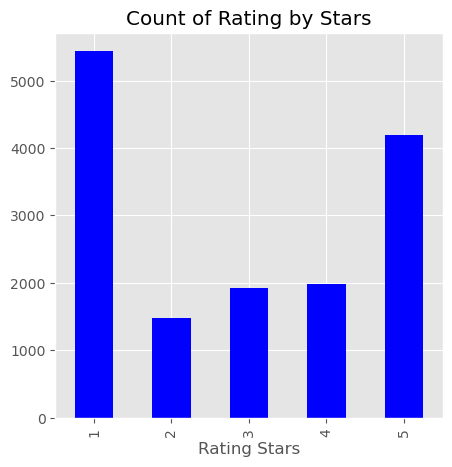

In [43]:
#Illustrates that the dataset is imbalanced when the target label is reviewed
axis = df['ratingvalue'].value_counts().sort_index()  \
.plot(kind='bar', title='Count of Rating by Stars',color='blue', figsize=(5,5))

axis.set_xlabel('Rating Stars')
plt.show()

In [44]:
#Checks for duplicate values in the text column
#Below code indicates that there are no duplicate values in the dataset
duplicate_values = df['text'].duplicated()
duplicate_values

0        False
1        False
2        False
3        False
4        False
         ...  
15012    False
15013    False
15014    False
15015    False
15016    False
Name: text, Length: 15017, dtype: bool

## Data Preprocessing  

Data preprocessing seeks to clean the dataset and prepare it for feature engineering. Firstly, columns that are not needed were dropped from the dataset then stopwords were collected from NLTK and Sklearn libraries. The text column with the reviews is then cleaned by changing text to lowercase, removing all spaces, removing punctuations, tokenizing all documents in the corpus and lemmatizing all tokenized documents. After the text cleaning, a new column with clean text called "clean_reviews" is created. Lastly, data visualization using wordcloud is undertaken to illustrate the most frequent words in the dataset.

In [45]:
#Drop the id column which is named as 'Unnamed: 0' in this dataset.
df.drop(['Unnamed: 0', 'reviewerName','createdAt'], axis = 1, inplace=True)
df.head()

,text,ratingvalue
0,"To tell you the truth, they sell fried chicken...",1
1,Crispy was so bad,3
2,The restaurant provided leas items which I ord...,1
3,already send you a picture about my meal. tota...,1
4,Excellent as before,5


In [46]:
#Below code seeks to read the first review in the text column
df['text'].values[4000]

'Very oily, hardly any flavours.'

**Defining Stopword - NLTK and SKLEARN Libraries**

In [47]:
#NLTK stopwords
nltk_stopwords = set(stopwords.words('english'))
#SKLEARN stopwords
sklearn_stopwords = set(ENGLISH_STOP_WORDS)

#Combine stopwords from nltk library and sklearn library
combined_stopwords = nltk_stopwords.union(sklearn_stopwords)
len(combined_stopwords)

378

**Cleaned the Text**

* Changed all text to lower case
* Removed all spaces from the text
* Removed all punctuations from the text
* Tokenized each word and removed all stopwords
* Lemmatized all the tokenized text in the dataset

In [48]:
def clean_text(df, text, clean_reviews):

    #Changes to lowercase and remove space on either side
    df[clean_reviews] = df[text].apply(lambda x: x.lower().strip())

    #Removes all extra spaces
    df[clean_reviews] = df[clean_reviews].apply(lambda x: re.sub(' +', ' ', x))

    #Removes all punctuations
    df[clean_reviews] = df[clean_reviews].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))

    #Tokenizes sentences in the text column
    df['tokenized_text'] = df[clean_reviews].apply(lambda x: nltk.tokenize.word_tokenize(x))

    #The WordNet lemmatizer helps with structuring the semantic relationship between words
    lemmatizer = WordNetLemmatizer()

    #Lemmatizes each word
    df['tokenized_text'] = df['tokenized_text'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

    #Removes all stopwords using the earlier combined stopwords
    df['clean_reviews'] = df['tokenized_text'].apply(lambda tokens: ' '.join([word for word in tokens if word not in combined_stopwords]))

    #Drops the intermediate tokenized_text column if you don't need it anymore
    df = df.drop(columns=['tokenized_text'])

    return df

#Calling the function
df = clean_text(df, 'text', 'clean_reviews')


In [49]:
#Prints out the first sentence in the uncleaned "text" column
print(df['text'].values[0])

To tell you the truth, they sell fried chicken now. Each Chicken Crispy is black inside and smells rotten, not mouth-watering. Please don't ban people's money.


In [50]:
#Prints out the first sentence in the cleaned "clean_reviews" column
print(df['clean_reviews'].values[0])

tell truth sell fried chicken chicken crispy black inside smell rotten mouth watering ban people money


In [51]:
df.head()

,text,ratingvalue,clean_reviews
0,"To tell you the truth, they sell fried chicken...",1,tell truth sell fried chicken chicken crispy b...
1,Crispy was so bad,3,crispy wa bad
2,The restaurant provided leas items which I ord...,1,restaurant provided lea item ordered
3,already send you a picture about my meal. tota...,1,send picture meal totally mass food coleslaw d...
4,Excellent as before,5,excellent


**Data Visualization of Word Frequecy**

In [52]:
#Prints out the top 50 most frequent words in the corpus

all_words = []
for word in df['clean_reviews']:
    all_words.extend(word.split())   #Splits words at spaces, tabs, whitespaces
print(all_words[:50])

['tell', 'truth', 'sell', 'fried', 'chicken', 'chicken', 'crispy', 'black', 'inside', 'smell', 'rotten', 'mouth', 'watering', 'ban', 'people', 'money', 'crispy', 'wa', 'bad', 'restaurant', 'provided', 'lea', 'item', 'ordered', 'send', 'picture', 'meal', 'totally', 'mass', 'food', 'coleslaw', 'dropped', 'al', 'packet', 'really', 'disappointed', 'food', 'packaging', 'wa', 'poor', 'delivery', 'man', 'mass', 'excellent', 'forgot', 'include', 'beverage', 'included', 'combo', 'meal']


In [53]:
#Prints out the number of words in the dataset after cleaning
len(all_words)

96603

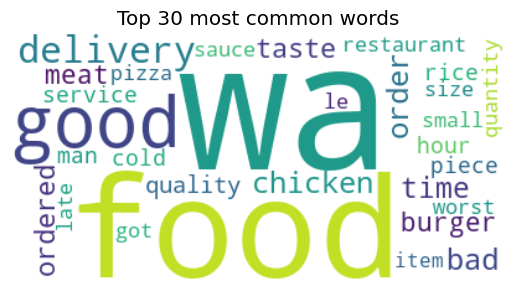

In [54]:
#Frequency distribution illustrated using the generated WordCloud from Matplotlib

all_text = ' '.join(all_words) #Combine all words into one string

wordcloud = WordCloud(collocations= False,max_words=30, background_color = 'white').generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Top 30 most common words')
plt.axis('off')
plt.show()

## Text Preprocessing (Feature Engineering)

The text preprocessing seeks to sparse and convert text into tokens. The Count Vectorizer was used initially used in the code but later on it was removed from the code as TF IDF performs better and does not require the count vectorizer. TF IDF was used to turn text into vectors that can be fed into machine learning models.

TF-IDF helps emphasize the importance of certain words in a corpus by focusing on both the occurrence of a word in a document (term frequency) and also the importance of the word in the entire corpus (inverse document frequency). The TF-IDF code highlights that the words that are common across many documents receive lower weights, while words that are specific to a document receive higher weights. A line of code was also run to check the sparsity of the non zero features which was 0.3% indicating that the dataset has a high sparse representation.


**Bag of Words Model:**

* Term Frequency - Inverse Document Frequency(TF-IDF)

**TF - IDF**

In [55]:
#TF-IDF model is run to measure how important each document is in the corpus
#The hyperparameter (min_df=2) only considers words that apply in two or more documents in the corpus

tfidf_model = TfidfVectorizer(min_df=2)

#This code aims to fit and transform the cleaned review column
tfidf_features = tfidf_model.fit_transform(df['clean_reviews'])

#Gets the feature names (words) from the TF-IDF vectorizer
tfidf_feature_names = tfidf_model.get_feature_names_out()


In [56]:
#After converting the text to vectors, the new vectorized dataset is added to the old dataset using the below code

df = df.join(pd.DataFrame(tfidf_features.toarray()))
inverted_index = {id: term for term, id in tfidf_model.vocabulary_.items()}
df.head()

,text,ratingvalue,clean_reviews,0,1,2,3,4,5,6,...,3229,3230,3231,3232,3233,3234,3235,3236,3237,3238
0,"To tell you the truth, they sell fried chicken...",1,tell truth sell fried chicken chicken crispy b...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Crispy was so bad,3,crispy wa bad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,The restaurant provided leas items which I ord...,1,restaurant provided lea item ordered,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,already send you a picture about my meal. tota...,1,send picture meal totally mass food coleslaw d...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Excellent as before,5,excellent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
#Prints the dimension of the dataframe of the train features which includes the tfidf vectors of all documents
tfidf_features.shape

(15017, 3239)

In [58]:
#Prints the vocabulary first 50 feature names
print(tfidf_feature_names[:50])

['aa' 'abar' 'abesh' 'able' 'abominable' 'abr' 'absent' 'absolute'
 'absolutely' 'absurd' 'abuse' 'accept' 'acceptable' 'accepted'
 'accepting' 'accident' 'accompanied' 'according' 'accordingly' 'account'
 'accurate' 'achar' 'achari' 'ache' 'acidity' 'act' 'action' 'actively'
 'actu' 'actual' 'actually' 'add' 'added' 'adding' 'addition' 'additional'
 'addon' 'address' 'adequate' 'adjusted' 'advance' 'advertised' 'af'
 'affordable' 'afraid' 'afternoon' 'agar' 'age' 'agei' 'agent']


In [59]:
#Prints the total number of datapoints present in the vectorized dataset
df.size/1e6

48.685114

In [60]:
#Counts the number of non zero elements in the dataset
np.count_nonzero(df)

129694

In [61]:
#To check sparsity representation, the below code is run to check the matrix density

print("The percent of non-zero element in the dataset is: ", 100*np.count_nonzero(df)/df.size)

The percent of non-zero element in the dataset is:  0.2663935427983182


## Train / Test Dataset Preparation

At this stage, the target and feature labels are set to aid the model building. The dataset is split into train, validation and test datasets. The dataset was first split into big train dataset and test dataset, then split the big train dataset into a validation and train dataset. Train (60%), Validation (20%) and Test (20%) dataset. Due to the dataset being imbalanced, a SMOTE oversampling technique was done to balance the dataset. Initially, the ADASYN technique was also used in this dataset but this led to a runtime error that also highlighted that there was no need to add the ADASYN technique to the dataset.

In [62]:
#Checks for the datatype of the features in the target label column
df["ratingvalue"].dtype

dtype('int64')

In [63]:
#Sets the target to the target label column, and formats the integer values to datatype float
target = df["ratingvalue"]
target = target.values
target = target.astype(float)

#The code sets the features by dropping the target label and all columns with non numeric values
#Then formats the datatype to float
features = df.drop(["text", "clean_reviews"], axis=1)
features = features.values
features = features.astype(float)

print("Shape of the whole dataset: ", features.shape)
print("Number of features: ", features.shape[1])

Shape of the whole dataset:  (15017, 3240)
Number of features:  3240


In [64]:
#Splits the train, validation and test datasets and also defines the x and y train, validation and test features
#Starts by first splitting the data into two sets big train and test dataset, then the big train is later split into validation and train dataset.

x_train_big, x_test, y_train_big, y_test = train_test_split(features, target, test_size=0.2, shuffle=True, stratify=target)
x_train, x_val, y_train, y_val = train_test_split(x_train_big, y_train_big, test_size=0.2,shuffle=True, stratify=y_train_big)

print("Train size:", x_train.shape)
print("Validation size: ", x_val.shape)
print("Test size:", x_test.shape)

Train size: (9610, 3240)
Validation size:  (2403, 3240)
Test size: (3004, 3240)


In [65]:
#To mitigate the imbalanced dataset, oversampling is done to the training dataset so as to balance the data.
x_resampled, y_resampled = SMOTE().fit_resample(x_train, y_train)
#x_resampled_2, y_resampled_2 = ADASYN().fit_resample(x_train, y_train)

## Model Comparison and Selection

Three functions were defined in this stage:

**Evaluation Metrics**

Four evaluation metrics were used: Geometric Mean Score, Accuracy, F1 score and Product Score of all three metrics. After evaluation, most of the metrics score were performed really well. The main evaluation metric that this pipeline focused on was the F1 score metric due to the below advantages:

* It balances the precision and recall taking into account both the false positive and false negatives and reducing the trade-off dilemma;
* It is sensitive to class imbalance;
* It provides a single metric that summarizes the performance of a classifier across all classes; and,
* It is easy to interpret.

The perfect evaluation metrics may lead to disavadvantages and limitaitons like overfitting, data leakage, limited generalization, inadequate evaluation and failure to identify model limitations. This pipeline has a perfect metric score meaning there is need to reevaluate the entire pipeline.


**Imbalanced and SMOTE**

Dataset was evaluated using the above highlighted matrics on both the imbalanced dataset and balanced dataset - SMOTE oversampling technique.

When ADASYN was used the dataset kept running into a runtime error that highlighted that the ADASYN oversampling technique was not useful for this pipeline. The ADASYN was having trouble finding any neighbors belonging to the majority class, which could have led to a division by zero error or NaN values. Therefore, ADASYN was removed from the pipeline and SMOTE was used instead for this specific dataset.

**Reviewed Models**

The following models were used to in the pipeline:
* LogisticRegression
* DecisionTreeClassifier
* RandomForestClassifier
* GradientBoostingClassifier
* GaussianNB
* KNeighborsClassifier
* LinearDiscriminantAnalysis
* QuadraticDiscriminantAnalysis

Despite having run the LogisticRegression, there was a convergence warning that indicated that the code failed to converge.
Additionally, the LinearDiscriminantAnalysis was removed from the pipeline as they did not perform well and the QuadraticDiscriminantAnalysis performed well but there was future warning in the code that needed some adjustments to the code. More information on how each algorithm performs has been added below.  


In [66]:
#Defining the evaluation metrics function that considers multiple metrics.
def product_score(y_true, y_pred):
    return geometric_mean_score(y_true, y_pred) * accuracy_score(y_pred, y_true) * f1_score(y_pred,y_true, average='weighted') ** (1. / 3)

def apply_model(clf_class, **kwargs):
    clf = clf_class(**kwargs)
    print(clf_class)
    print("---------------------------------------------------------------------")

    clf.fit(x_train, y_train)
    pred = clf.predict(x_val)
    gms = geometric_mean_score(y_val, pred)
    acc = accuracy_score(y_val, pred)
    f1 = f1_score(y_val, pred, average='weighted')
    prod = product_score(y_val,pred)
    print("Imbalanced:   G-mean {:.3f}     Accuracy {:.3}       F1 {:.3}       Product {:.3f}". format(gms, acc, f1, prod))

    clf.fit(x_resampled, y_resampled)
    pred = clf.predict(x_val)
    gms = geometric_mean_score(y_val, pred)
    acc = accuracy_score(y_val, pred)
    f1 = f1_score(y_val, pred, average='weighted')
    prod = product_score(y_val,pred)
    print("SMOTE:   G-mean {:.3f}     Accuracy {:.3}       F1 {:.3}       Product {:.3f}". format(gms, acc, f1, prod))

    # clf.fit(x_resampled_2, y_resampled_2)
    # pred = clf.predict(x_val)
    # gms = geometric_mean_score(y_val, pred)
    # acc = accuracy_score(y_val, pred)
    # f1 = f1_score(y_val, pred)
    # prod = product_score(y_val,pred)
    # print("ADASYN:   G-mean {:.3f}     Accuracy {:.3}       F1 {:.3}       Product {:.3f}". format(gms, acc, f1, prod))


def compare_models():
    apply_model(LogisticRegression)
    apply_model(DecisionTreeClassifier)
    apply_model(RandomForestClassifier)
    apply_model(GradientBoostingClassifier)
    apply_model(GaussianNB)
    apply_model(KNeighborsClassifier)
    #apply_model(LinearDiscriminantAnalysis)
    #apply_model(QuadraticDiscriminantAnalysis)

compare_models()

<class 'sklearn.linear_model._logistic.LogisticRegression'>
---------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Imbalanced:   G-mean 1.000     Accuracy 1.0       F1 1.0       Product 1.000


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SMOTE:   G-mean 1.000     Accuracy 1.0       F1 1.0       Product 1.000
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
---------------------------------------------------------------------
Imbalanced:   G-mean 1.000     Accuracy 1.0       F1 1.0       Product 1.000
SMOTE:   G-mean 1.000     Accuracy 1.0       F1 1.0       Product 1.000
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
---------------------------------------------------------------------
Imbalanced:   G-mean 0.923     Accuracy 0.955       F1 0.954       Product 0.868
SMOTE:   G-mean 0.939     Accuracy 0.966       F1 0.965       Product 0.897
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
---------------------------------------------------------------------
Imbalanced:   G-mean 1.000     Accuracy 1.0       F1 1.0       Product 1.000
SMOTE:   G-mean 1.000     Accuracy 1.0       F1 1.0       Product 1.000
<class 'sklearn.naive_bayes.GaussianNB'>
---------------------------------------------------

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Imbalanced:   G-mean 1.000     Accuracy 1.0       F1 1.0       Product 1.000
SMOTE:   G-mean 0.999     Accuracy 1.0       F1 1.0       Product 0.999


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


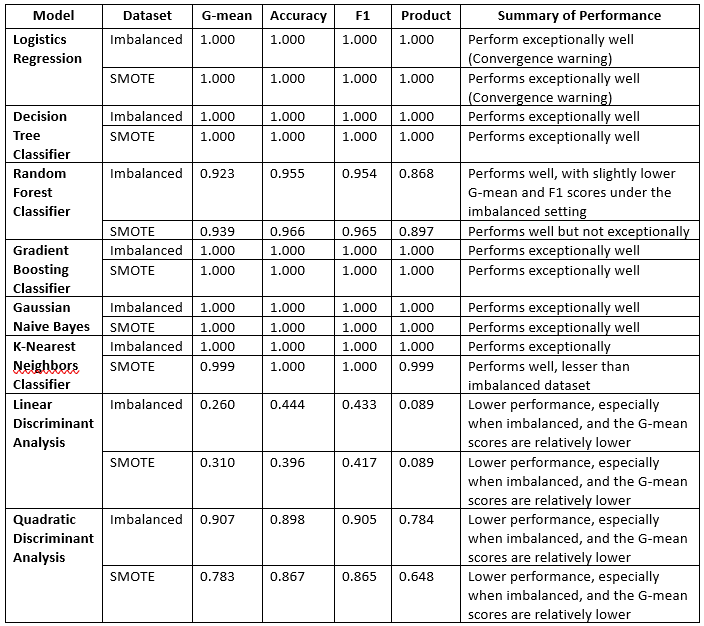

The model evaluation highlighted several models that performed really well, therefore, for this pipeline, Gradient Boosting Classifier was selected as the best model as it was one of the models that performed exceptionally well in this pipeline.

### Hyperparameter Tuning

Based on the model selected, Gradient Boosting Classifier, hyperparameter tuning was conducted to select the best parameters.

In [68]:
n_estimators = [50,100, 150]  #Number of boosting stages to be run
learning_rates = [.01, .1, .5]   #The rate at which the algorithm adapts to the errors from the previous stages.
max_depths = [3, 5]   #Maximum depth of the indivitual trees

print("Manual Grid Search Results: \n")

#Seeks to manually run through all the selected parameters and select the best hyperparameters with the best metric score.
max_f1 = 0
best_hyper_params = []
for n in n_estimators:
  for r in learning_rates:
    for d in max_depths:
      model = GradientBoostingClassifier(n_estimators=n, learning_rate=r, max_depth=d)
      model.fit(x_resampled, y_resampled)
      pred = model.predict(x_val)
      f1 = f1_score(y_val, pred, average='weighted')
      print("n_estimators = {:3d}       learning_rate = {:.2f}      max_depth ={:g}     f1 = {:.3f}". format(n, r, d, f1))

      if f1 > max_f1:
        maxf1 = f1
        best_hyper_params = [n, r, d]



Manual Grid Search Results: 

n_estimators =  50       learning_rate = 0.01      max_depth =3     f1 = 1.000
n_estimators =  50       learning_rate = 0.01      max_depth =5     f1 = 1.000
n_estimators =  50       learning_rate = 0.10      max_depth =3     f1 = 1.000
n_estimators =  50       learning_rate = 0.10      max_depth =5     f1 = 1.000
n_estimators =  50       learning_rate = 0.50      max_depth =3     f1 = 1.000
n_estimators =  50       learning_rate = 0.50      max_depth =5     f1 = 1.000
n_estimators = 100       learning_rate = 0.01      max_depth =3     f1 = 1.000
n_estimators = 100       learning_rate = 0.01      max_depth =5     f1 = 1.000
n_estimators = 100       learning_rate = 0.10      max_depth =3     f1 = 1.000
n_estimators = 100       learning_rate = 0.10      max_depth =5     f1 = 1.000
n_estimators = 100       learning_rate = 0.50      max_depth =3     f1 = 1.000
n_estimators = 100       learning_rate = 0.50      max_depth =5     f1 = 1.000
n_estimators = 150    

In [71]:
print("=======================================================================================================")
print("The best hyperparameter set:\n")
print("n_estimators = {:3d}      learning_rate = {:.2f}     max_depth ={:g}     f1 = {:.3f}". format(best_hyper_params[0], best_hyper_params[1], best_hyper_params[2], maxf1))

The best hyperparameter set:

n_estimators = 150      learning_rate = 0.50     max_depth =5     f1 = 1.000


## Suggested Predictive Model

After training different models, testing out different evaluation metrics, running the grid search to select the best hyperparameters and selecting the best model for the dataset, the selected model is used to then used to predict values on the test dataset and evaluate the predicted and actual values. Before the test dataset is used to predict the model, the big train dataset is balanced using the SMOTE oversampling technique using the best hyperparameters and then fit on the big train balanced dataset.  

The Classification report highlights the Class Labels (1.0, 2.0, 3.0, 4.0, 5.0).

Precision is a measure of the accuracy of the positive predictions, the below code indicates perfect precision.

Recall measure the ability of the classifier to capture all the relevant instances of a class, the below socre indicates perfect recall.

F1 Score provides the balanced measure of a model's performance considering both false positives and false negatives. The F1 score of 1.00 indicates a perfect balance between precision and recall.

Support is the number of actual occurrences of the class in the specified dataset. It represents the number of instances belonging to each class.

Accuracy is the ratio of correctly predicted instances to the total instances. 


In [89]:
#The big train dataset to balance the dataset (train plus validation) before the model is fit on the Gradient Boosting Classifier.
x_big_resampled, y_big_resampled = SMOTE().fit_resample(x_train_big, y_train_big)

model = GradientBoostingClassifier(n_estimators=best_hyper_params[0], learning_rate=best_hyper_params[1], max_depth=best_hyper_params[2])
print("Suggested Predictive Model is: \n")
display(model)

#Training model with SMOTE on the big train dataset
gbs_model = model.fit(x_big_resampled, y_big_resampled)

#The x test is used to predict the y predicted value
y_pred = model.predict(x_test)

#Prints out the classification report with evaluation metrics
print("\n Classification Report: ")
print(classification_report(y_test, y_pred))
print("============================================================================================")
gms = geometric_mean_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")
prod = product_score(y_test, y_pred)

print("\n  G-mean {:.2f}     Accuracy {:.2f}       F1 {:.2f}      Product {:.3f}". format(gms, acc, f1, prod))

Suggested Predictive Model is: 



GradientBoostingClassifier(learning_rate=0.5, max_depth=5, n_estimators=150)


 Classification Report: 
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1087
         2.0       1.00      1.00      1.00       295
         3.0       1.00      1.00      1.00       386
         4.0       1.00      1.00      1.00       396
         5.0       1.00      1.00      1.00       840

    accuracy                           1.00      3004
   macro avg       1.00      1.00      1.00      3004
weighted avg       1.00      1.00      1.00      3004


  G-mean 1.00     Accuracy 1.00       F1 1.00      Product 1.000


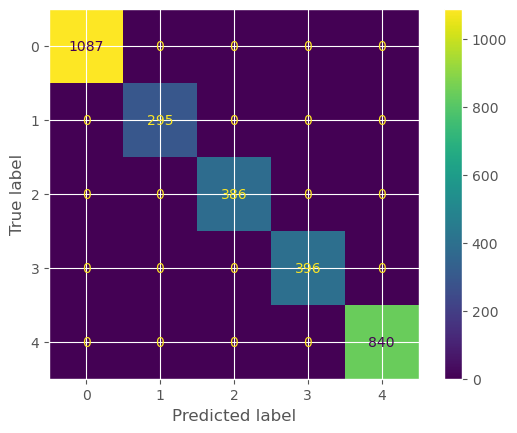

In [109]:
#Illustrates the actual number of occurences of each class label in the confusion matrix
#Uses the actual y_test and predicted y_pred with five classes
cm = confusion_matrix(y_test, y_pred, labels=[1, 2, 3, 4, 5])

#Creates a ConfusionMatrixDisplay object and plot the confusion matrix
ConfusionMatrixDisplay(cm).plot()

Based on the confusion metrics conducted, rating value 1 had the highest number occurences with 1,087 and rating value 5 had the second highest number of occurences with 840. This indicates that the Restaurants might want to work on improving their services and menu to increase their ratings considering that the number of negative reviews is higher than the positive reviews given by customers.

## Feature Importance Analysis

Feature importance is a measure of how valuable each feature is in the construction of the boosted decision trees. It is determined by the extent to which each feature improves the model's performance, weighted by the number of observations affected by the feature's split point. 

This stage seeks to gain insights into which feature (terms in the text data) contribute the most to the model's predictions. The horizontal bar chart provides a clear visualization of the relative importance of each feature. Based on the below findings, "aa" is the most important feature in this corpus.


Top 15 Important features:
[1. 0. 0. ... 0. 0. 0.]


<AxesSubplot:>

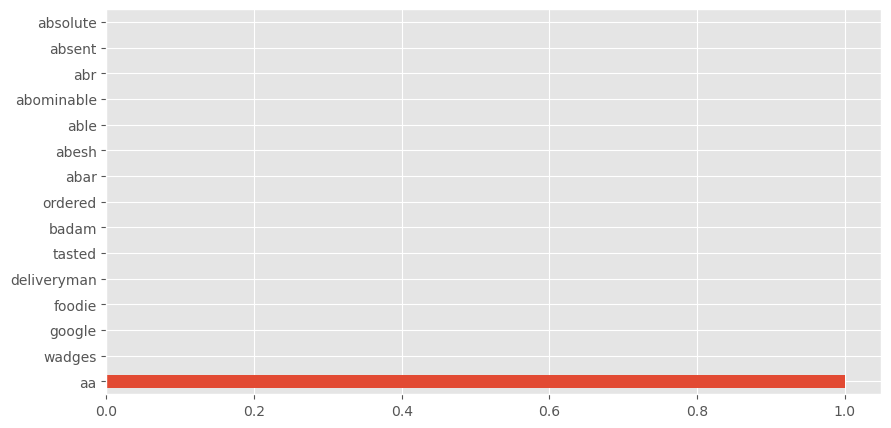

In [107]:
#Sets the number of top features to display
Top_N = 15

#Gets feature names from the TF-IDF model
feature_names = tfidf_model.get_feature_names_out()

#Prints a header indicating the top N important features
print("Top", Top_N, "Important features:")
feature_importance = model.feature_importances_
print(model.feature_importances_)

#Creates a dictionary by zipping the feature names and their corresponding importances
feat_importance_dict = dict(zip(feature_names, feature_importance))

#Creates a Pandas Series from the dictionary for easier handling and visualization
feat_importance = pd.Series(feat_importance_dict)

#Selects the top N features based on their importance
feat_importance = feat_importance.nlargest(Top_N)

#Plots a horizontal bar chart of the top N important features
feat_importance.plot(kind="barh", figsize=(10, 5))

## Conclusion

The dataset was cleaned and preprocessed, then feature contruction and balancing of the imbalanced dataset, model building using several classification algorithms, using grid search to find the best hyperparameters for the selected model algorithm and applying the selected model and hyperparameters to the test dataset to evaluate the new model. The pipeline had a perfect score in most of the evaluation metrics. 

Despite the pipeline having perfect scores in evaluation metrics, there could be some potential disadvantages and limitations:  

* Overfitting - Perfect scores might be an indication of overfitting. The model has learned the training data too well and fails to generalize to new, unseen data. This may lead to the pipeline capturing noise in the training set, leading to poor performance on real-world data.

* Imbalanced classes - Perfect scores can be misleading, especially in the presence of imbalanced classes. If one class significantly dominates the dataset, a model might achieve high accuracy by simply predicting the majority class without truly learning the underlying patterns in the data.

* Data leakage - Perfect scores could  be a sign of unintentional data leakage, where information from the test set influences the model during training. 

* Limited Generalization - The model might not generalize well to new, unseen data. 

* Inadequate Evaluation -  Perfect scores may not reflect the true performance of the model. 

* Failure to Identify Model Limitations -  The model may perform exceptionally well on one dataset may fail to generalize to different distributions, and perfect scores may mask its weaknesses.
